In [1]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim

from helper import *

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### MNIST dataset
The MNIST dataset is loaded.

In [3]:
trainset = datasets.FashionMNIST('', download=True, train=True, transform=transform)
valset = datasets.FashionMNIST('', download=True, train=False, transform=transform)

In [4]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


# LBFGS full-batch hyperparameters tuning 



In [5]:
datapoints=[len(trainset)]
history_size_grid=[5,10,20]

In [16]:
epochs = 30

### Fully connected network

In [17]:
training_loss_fcnn, test_loss_fcnn,training_accuracy_fcnn, test_accuracy_fcnn, time_fcnn =hyperparameters_tuning_LBFGS_minibatch(trainset,valset,datapoints, history_size_grid, epochs, "FCNN",fullbatch=True)

Minibatch size:  60000
History size:  5
Epoch 0
Training loss: 0.7616307139396667
Number Of Images Tested = 10000
Model Accuracy = 0.695
Number Of Images Tested = 60000
Model Accuracy = 0.7053833333333334
Test loss: 0.7831079959869385 

Epoch 1
Training loss: 0.5944021344184875
Number Of Images Tested = 10000
Model Accuracy = 0.7709
Number Of Images Tested = 60000
Model Accuracy = 0.7821
Test loss: 0.6182271242141724 

Epoch 2
Training loss: 0.5078775882720947
Number Of Images Tested = 10000
Model Accuracy = 0.8041
Number Of Images Tested = 60000
Model Accuracy = 0.8168666666666666
Test loss: 0.540503740310669 

Epoch 3
Training loss: 0.4629906117916107
Number Of Images Tested = 10000
Model Accuracy = 0.8198
Number Of Images Tested = 60000
Model Accuracy = 0.8337833333333333
Test loss: 0.4988531172275543 

Epoch 4
Training loss: 0.4304986298084259
Number Of Images Tested = 10000
Model Accuracy = 0.8302
Number Of Images Tested = 60000
Model Accuracy = 0.84755
Test loss: 0.46905013918876

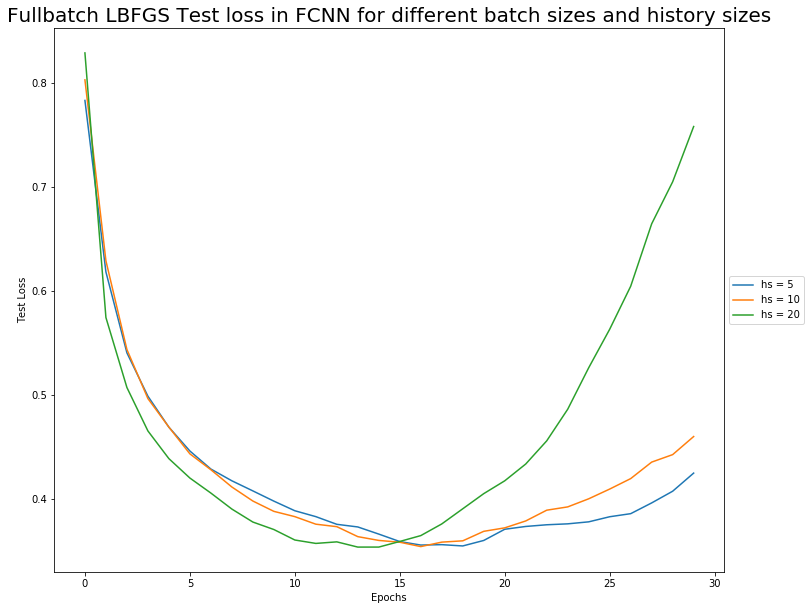

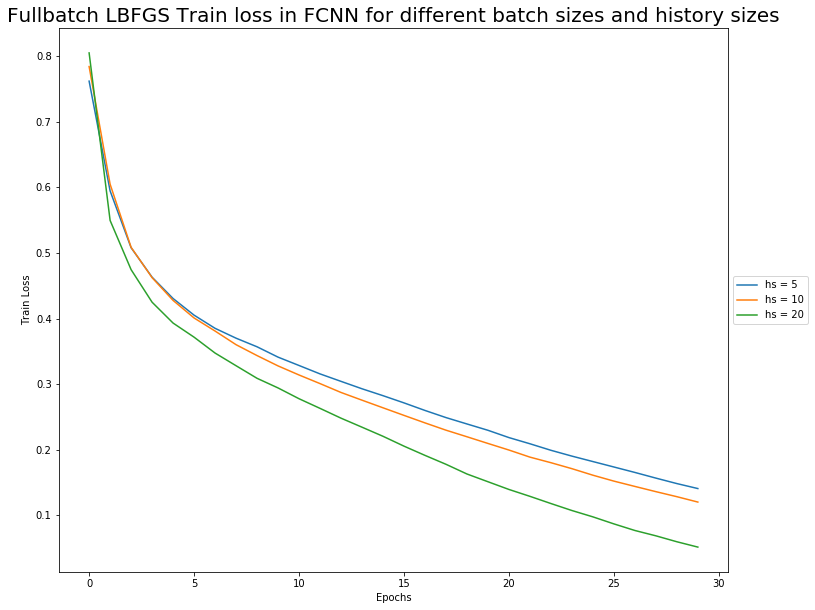

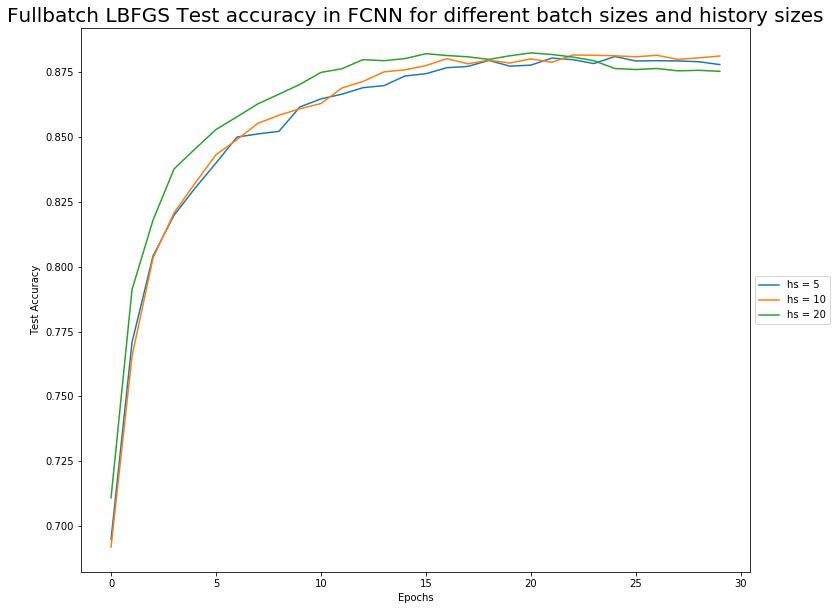

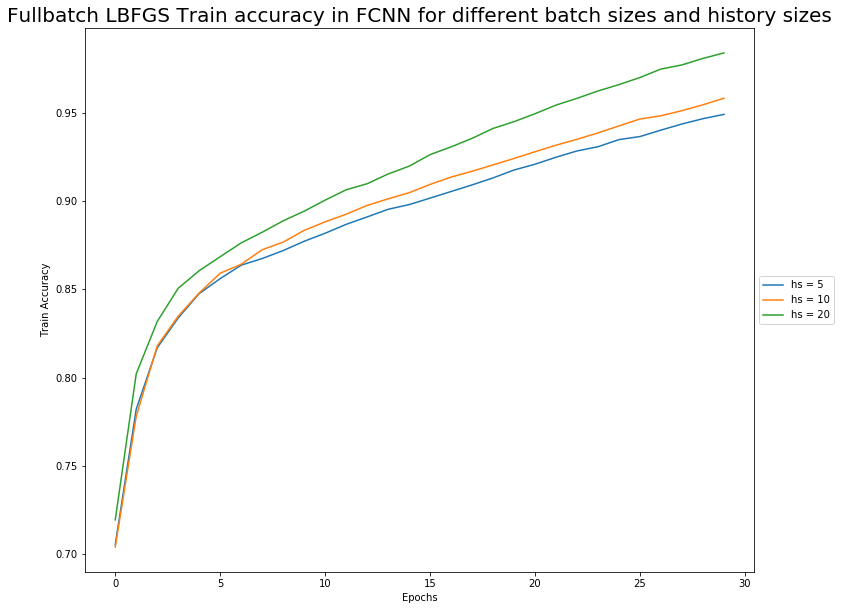

In [18]:
for bs_index,bs in enumerate(datapoints):
    for hs_index,hs in enumerate(history_size_grid):
        plt.figure(1, figsize = (12,10))
        plt.plot(test_loss_fcnn[hs_index*bs_index+hs_index],label='hs = {}'.format(hs))
        plt.figure(2, figsize = (12,10))
        plt.plot(training_loss_fcnn[hs_index*bs_index+hs_index],label='hs = {}'.format(hs))
        plt.figure(3, figsize = (12,10))
        plt.plot(test_accuracy_fcnn[hs_index*bs_index+hs_index],label='hs = {}'.format(hs))
        plt.figure(4, figsize = (12,10))
        plt.plot(training_accuracy_fcnn[hs_index*bs_index+hs_index],label='hs = {}'.format(hs))

plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Fullbatch LBFGS Test loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Fashion_LBFGS_test_loss_fcnn.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Fullbatch LBFGS Train loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Fashion_LBFGS_train_loss_fcnn.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Fullbatch LBFGS Test accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Fashion_LBFGS_test_acc_fcnn.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Fullbatch LBFGS Train accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Fashion_LBFGS_train_acc_fcnn.jpg")

In [19]:
np.savetxt('Fashion_LBFGS_fullbatch_fcNN_trainloss.txt', training_loss_fcnn)
np.savetxt('Fashion_LBFGS_fullbatch_fcNN_testloss.txt', test_loss_fcnn)
np.savetxt('Fashion_LBFGS_fullbatch_fcNN_trainacc.txt', training_accuracy_fcnn)
np.savetxt('Fashion_LBFGS_fullbatch_fcNN_testacc.txt', test_accuracy_fcnn)
np.savetxt('Fashion_LBFGS_fullbatch_fcNN_times.txt',time_fcnn)

### Convolutional neural network

### No line search

In [6]:
epochs=15

In [7]:
training_loss_fcnn, test_loss_fcnn,training_accuracy_fcnn, test_accuracy_fcnn, time_fcnn =hyperparameters_tuning_LBFGS_minibatch(trainset,valset,datapoints, history_size_grid, epochs, "CNN",fullbatch=True,line_search=False)


Minibatch size:  60000
History size:  5
Epoch 0
Training loss: 0.6236373782157898
Number Of Images Tested = 10000
Model Accuracy = 0.7803
Number Of Images Tested = 60000
Model Accuracy = 0.7825333333333333
Test loss: 0.5886245369911194 

Epoch 1
Training loss: 0.45597073435783386
Number Of Images Tested = 10000
Model Accuracy = 0.833
Number Of Images Tested = 60000
Model Accuracy = 0.84025
Test loss: 0.47518399357795715 

Epoch 2
Training loss: 0.37916800379753113
Number Of Images Tested = 10000
Model Accuracy = 0.854
Number Of Images Tested = 60000
Model Accuracy = 0.8642666666666666
Test loss: 0.40254947543144226 

Epoch 3
Training loss: 0.332017719745636
Number Of Images Tested = 10000
Model Accuracy = 0.8713
Number Of Images Tested = 60000
Model Accuracy = 0.8820833333333333
Test loss: 0.3588622212409973 

Epoch 4
Training loss: 0.2981792688369751
Number Of Images Tested = 10000
Model Accuracy = 0.8803
Number Of Images Tested = 60000
Model Accuracy = 0.8933666666666666
Test loss: 0

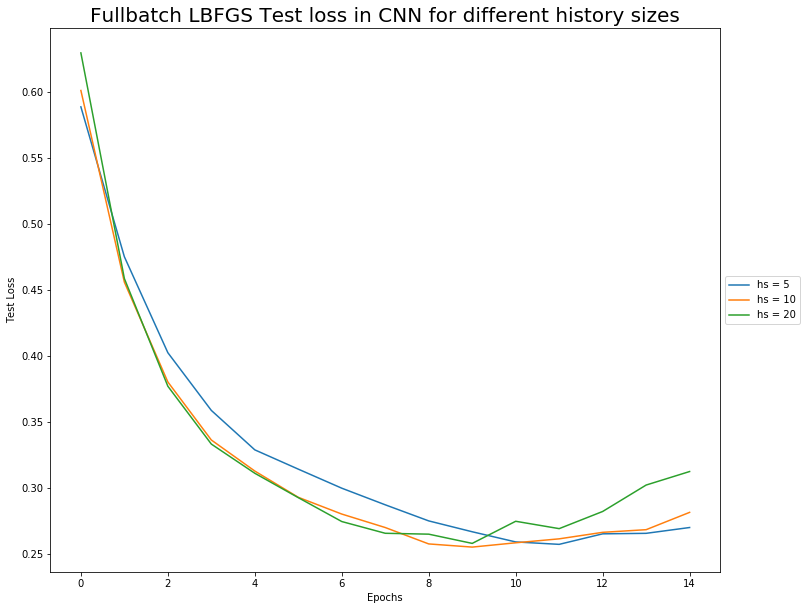

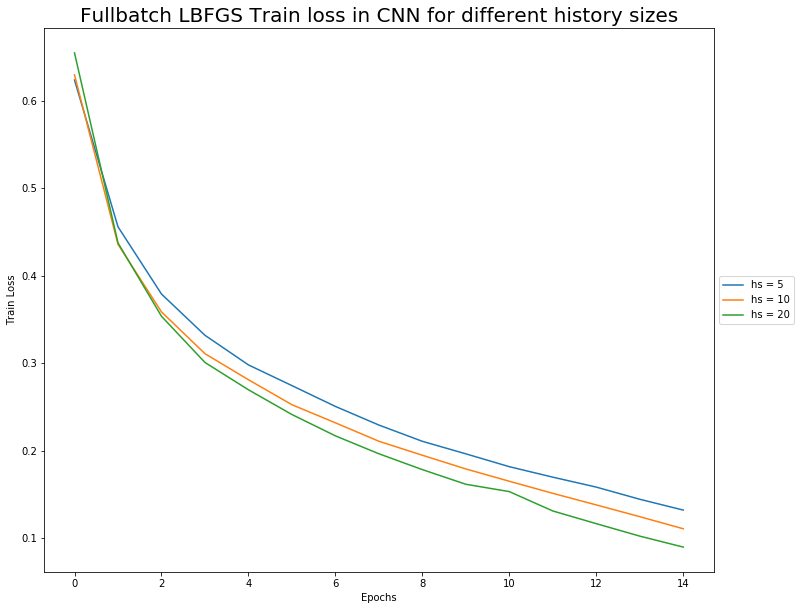

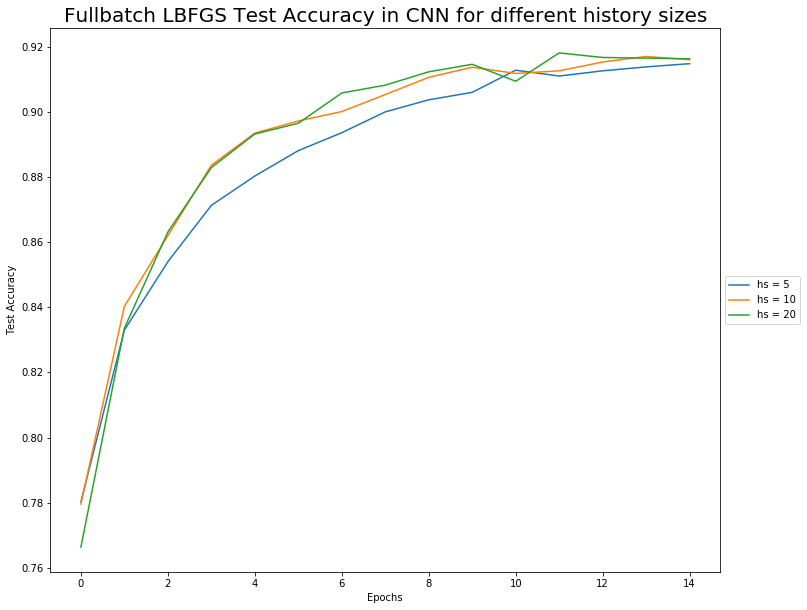

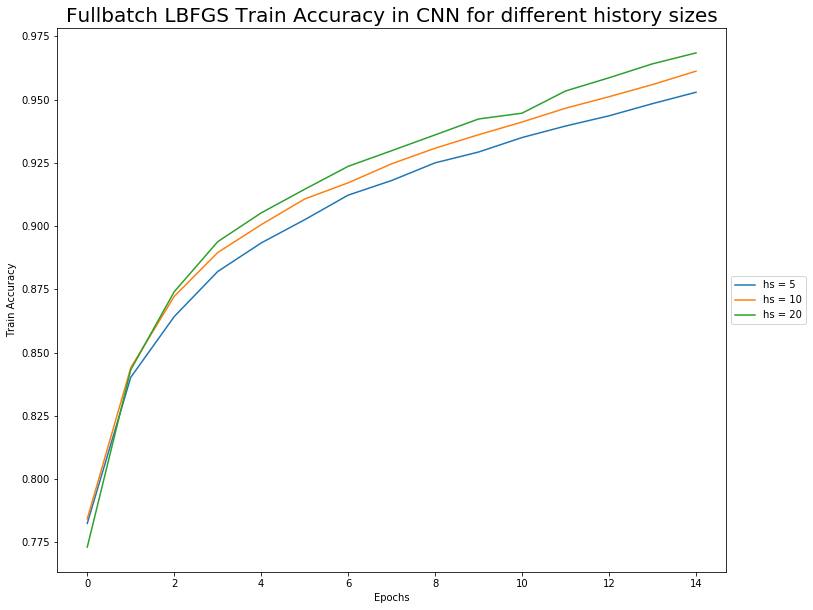

In [8]:
for bs_index,bs in enumerate(datapoints):
    for hs_index,hs in enumerate(history_size_grid):
        plt.figure(1, figsize = (12,10))
        plt.plot(test_loss_fcnn[hs_index*bs_index+hs_index],label='hs = {}'.format(hs))
        plt.figure(2, figsize = (12,10))
        plt.plot(training_loss_fcnn[hs_index*bs_index+hs_index],label='hs = {}'.format(hs))
        plt.figure(3, figsize = (12,10))
        plt.plot(test_accuracy_fcnn[hs_index*bs_index+hs_index],label='hs = {}'.format(hs))
        plt.figure(4, figsize = (12,10))
        plt.plot(training_accuracy_fcnn[hs_index*bs_index+hs_index],label='hs = {}'.format(hs))

plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Fullbatch LBFGS Test loss in CNN for different history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Fashion_LBFGS_test_loss_cnn.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Fullbatch LBFGS Train loss in CNN for different history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Fashion_LBFGS_train_loss_cnn.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Fullbatch LBFGS Test Accuracy in CNN for different history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Fashion_LBFGS_test_acc_cnn.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Fullbatch LBFGS Train Accuracy in CNN for different history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Fashion_LBFGS_train_acc_cnn.jpg")
